<a href="https://colab.research.google.com/github/sarindesai/Assignment13-KNN/blob/main/Assignment13_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [393]:
#import libraries
from pandas import read_csv
import pandas as pd 
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

#Zoo Dataset

In [394]:
zoo = pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/KNN/Zoo.csv')
zoo
zoo=zoo.iloc[:,1:]


###Data Exploration

In [395]:
zoo.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

In [396]:
zoo.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [397]:
zoo.describe(include='all')

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [398]:
zoo.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

###Visualization

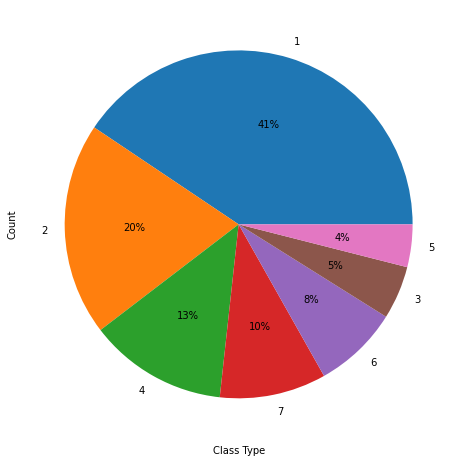

In [399]:
plt.figure(figsize=(8,8));
zoo.type.value_counts().plot(kind="pie",autopct='%1.0f%%');
plt.title=("Class wise plot");
plt.xlabel('Class Type');
plt.ylabel("Count");
plt.plot();

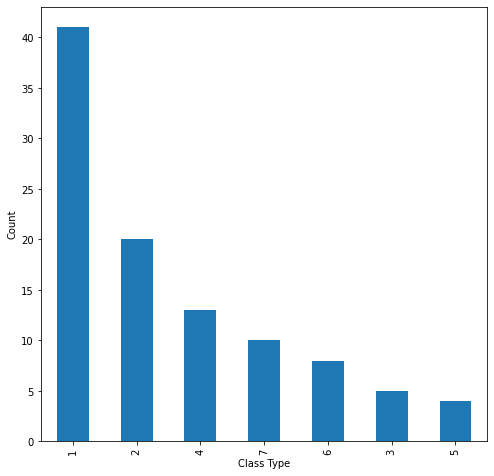

In [400]:
# Class wise animal counts.
# We can see, mostly animals belong to the class 1 which is Mammal.
plt.figure(figsize=(8,8));
zoo.type.value_counts().plot(kind="bar");
plt.title=("Class wise plot");
plt.xlabel('Class Type');
plt.ylabel("Count");
plt.plot();

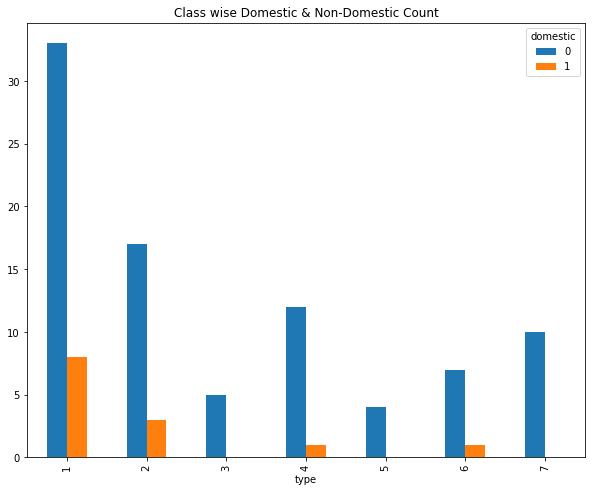

In [401]:
# Lets see species wise domestic and non-domestic animals

pd.crosstab(zoo.type,zoo.domestic).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

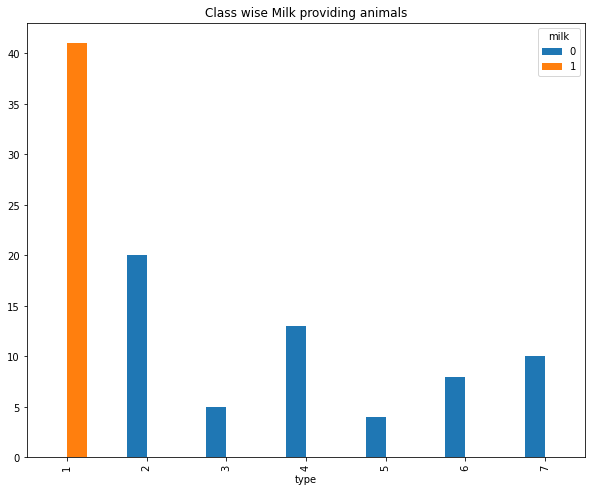

In [402]:
pd.crosstab(zoo.type, zoo.milk).plot(kind="bar", title="Class wise Milk providing animals", figsize=(10, 8));

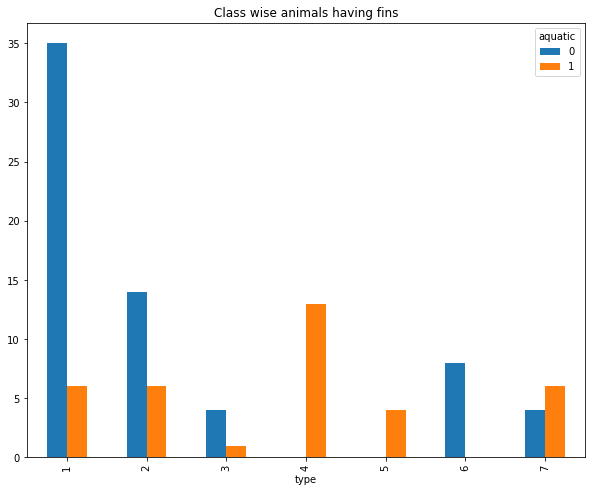

In [403]:
# Lets plot category wise animals having fins
pd.crosstab(zoo.type, zoo.aquatic).plot(kind="bar",title="Class wise animals having fins", figsize=(10, 8));

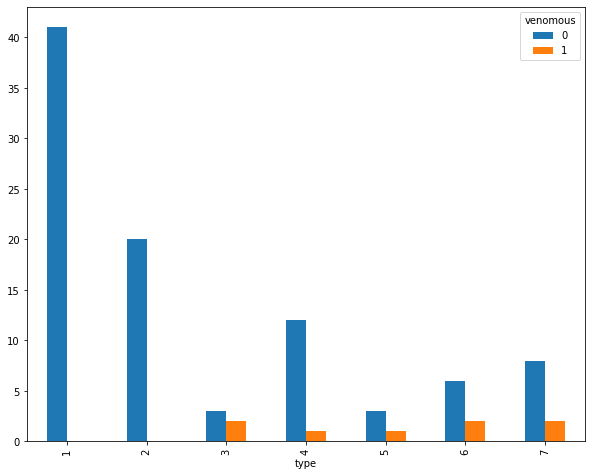

In [404]:
# As per our data we have 2 reptiles which are venomous and , 1 fish and other class types
pd.crosstab(zoo.type, zoo.venomous).plot(kind="bar", figsize=(10, 8))

###Correlation Matrix

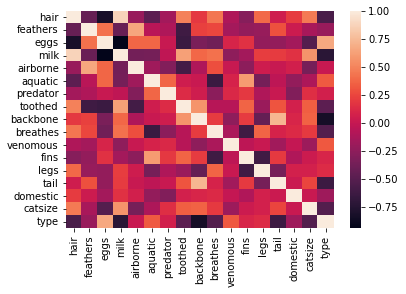

In [405]:
cor = zoo.corr()
sns.heatmap(cor)

In [406]:
#to split train and test data
from sklearn.model_selection import train_test_split
train,test=train_test_split(zoo,test_size=0.3,random_state=0)

###KNN Classification

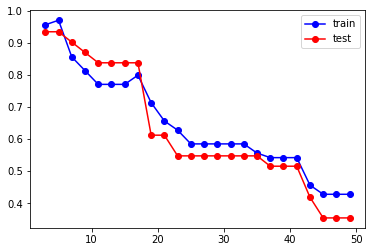

In [407]:
filename = ('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/KNN/Zoo.csv')
names = ['preg','plas','pres','skin','mass','pedi','age','class']
from sklearn.neighbors import KNeighborsClassifier as KNC
#to find best k value
acc=[]
for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
    train_acc=np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc.append([train_acc,test_acc])
    
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'bo-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['train','test'])


from plots atk=5 we get best model

In [408]:
num_folds = 10
kfold = KFold(n_splits=10)

In [409]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, x, y, cv=kfold)

In [410]:
print(results.mean())

nan


###Model Building

In [411]:
Neigh=KNC(n_neighbors=5)
neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
train_acc=np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
test_acc=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
train_acc
test_acc

0.3548387096774194

### K Fold Cross Validation

In [412]:
array = zoo.values
X = array[:,0:8]
Y = array[:,8]

In [413]:
# num_folds = 10
kfold = KFold(n_splits=10)
#Just one of this

In [414]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model,X,Y,cv=kfold)  #cross_val_score - Passes the array of accuracies

In [415]:
print(results.mean())

0.9199999999999999


###Visualize CV result

In [416]:
import matplotlib.pyplot as plt
%matplotlib inline

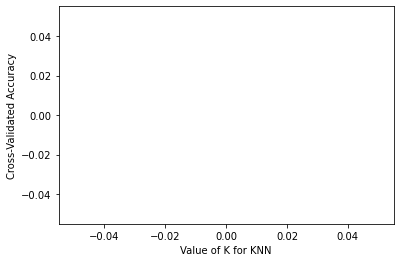

In [417]:
k_range = range(1,41)
k_scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x, y, cv=5)
  k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()  

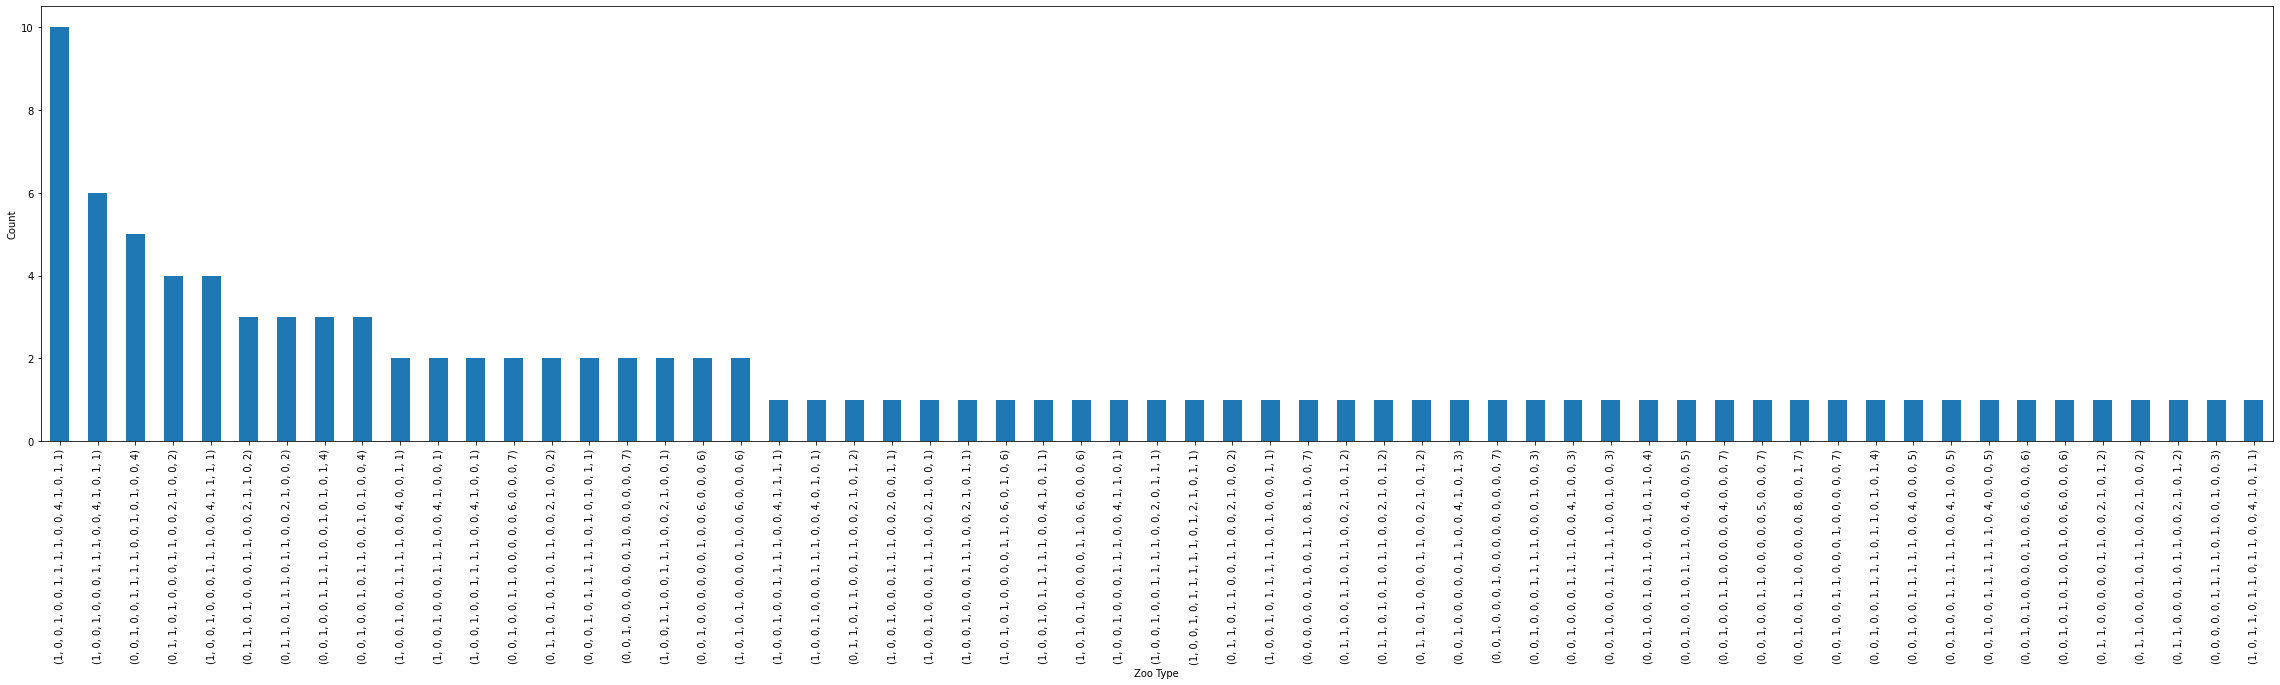

In [418]:
# Class wise animal counts.
# We can see, mostly animals belong to the class 1 which is Mammal.
plt.figure(figsize=(40,8));
zoo.value_counts().plot(kind="bar");
plt.xlabel('Zoo Type');
plt.ylabel("Count");
plt.plot();

#GLASS.data_csv

In [419]:
#import libraries
from pandas import read_csv
import pandas as pd 
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

In [420]:
glass = pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/KNN/glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#Data Exploration

In [421]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [422]:
# value count for glass types
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [423]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [424]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [425]:
glass.describe(include='all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#Visualization

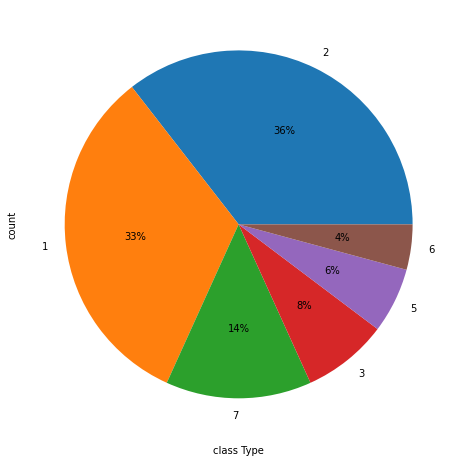

In [426]:
plt.figure(figsize=(8,8));
glass.Type.value_counts().plot(kind="pie",autopct='%1.0f%%');
plt.title=("class wise plot");
plt.xlabel('class Type');
plt.ylabel("count");
plt.plot();

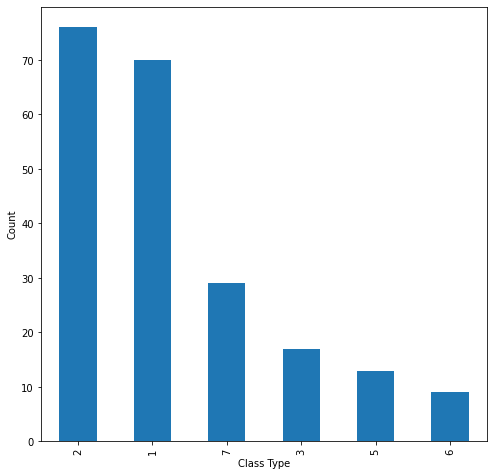

In [427]:
plt.figure(figsize=(8,8));
glass.Type.value_counts().plot(kind="bar");
plt.title=("Class wise plot");
plt.xlabel('Class Type');
plt.ylabel("Count");
plt.plot();

#Correlation Matrix

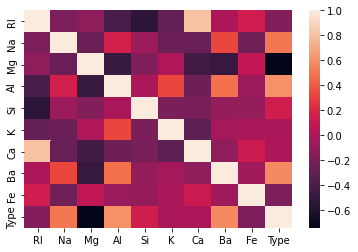

In [428]:
cor = glass.corr()
sns.heatmap(cor)



*  We can notice that Ca and K values don't affect Type that much.

*  Also can notice that Ca & K values don't affect Type that much.

*   So we can go ahead and drop Ca, and also K.(performed later)




###Scatter plot of two features and pairwise plot

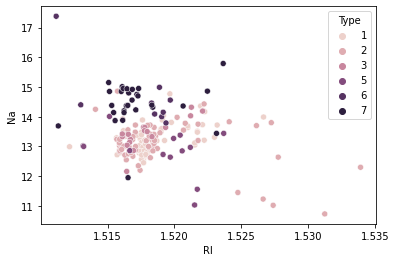

In [429]:
sns.scatterplot(glass['RI'],glass['Na'],hue=glass['Type'])

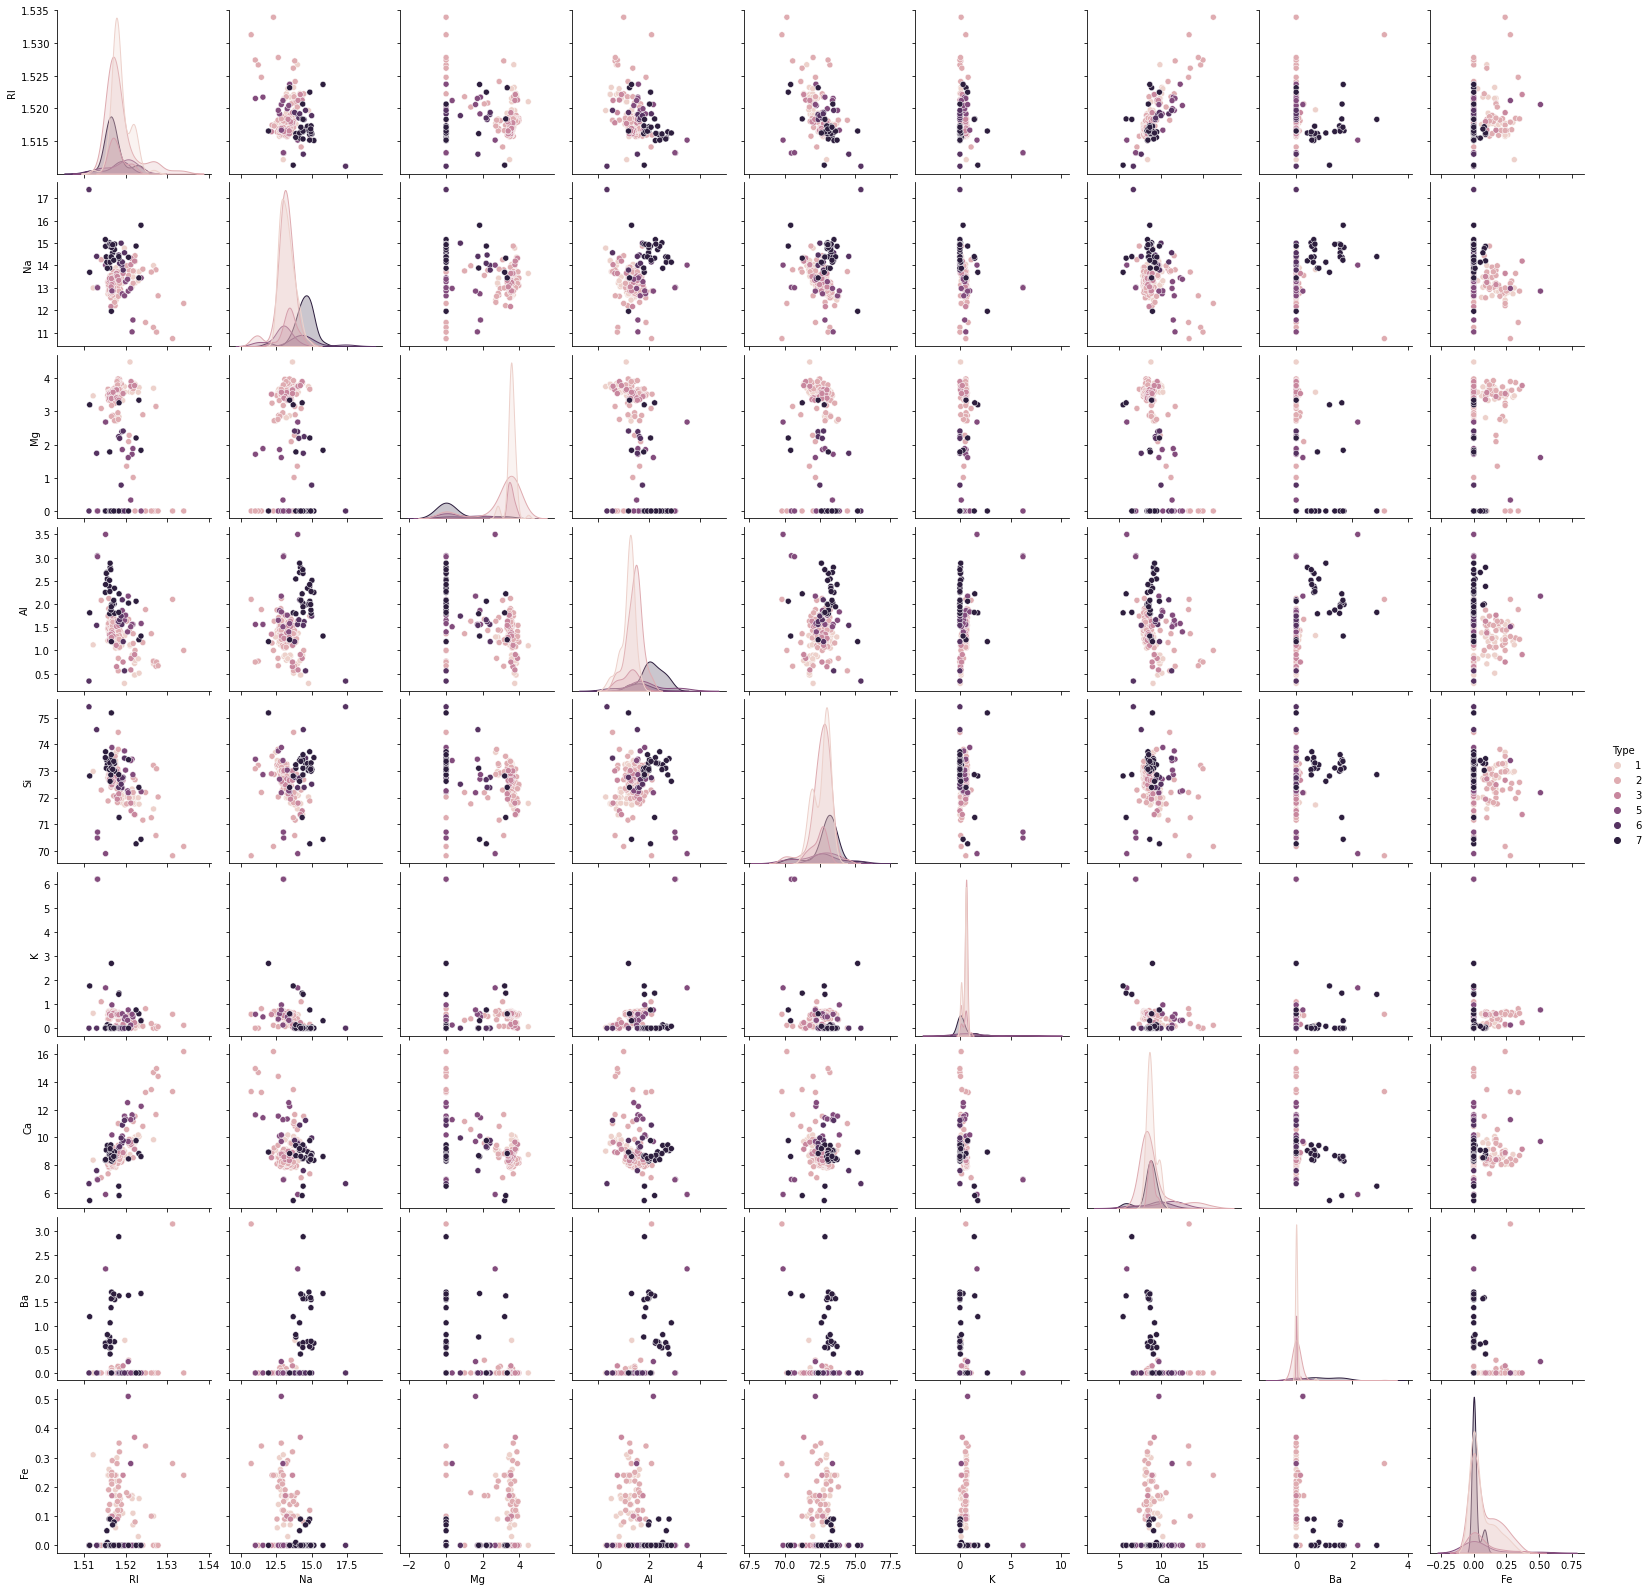

In [430]:
#pairwise plot of all the features
sns.pairplot(glass,hue='Type')
plt.show()

The pairplot shows that the data is not linear and KNN can be applied to get nearest neighbors and classify the glass types

###Feature Scaling

Scaling is necessary for distance-based algorithms such as KNN. This is to avoid higher weightage being assigned to data with a higher magnitude.

Using standard scaler we can scale down to unit variance.

In [431]:
scaler = StandardScaler()

In [432]:
scaler.fit(glass.drop('Type',axis=1))

StandardScaler()

In [433]:
#perform transformation
scaled_features = scaler.transform(glass.drop('Type',axis=1))
scaled_features

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [434]:
glass_feat = pd.DataFrame(scaled_features,columns=glass.columns[:-1])
glass_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


##KNN-Classifier

*   Drop features that are not required

*   Use random state while splitting the data to ensure reproducibility and consistency

*   Experiment with distance metrics - Euclidean, manhattan

In [435]:
filename = ('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/KNN/glass.csv')
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
x = array[:,0:8]
y = array[:,8]

In [436]:
glass1 = glass_feat.drop(['Ca','K'],axis=1) #Removing features - Ca and K 
X_train,X_test,y_train,y_test  = train_test_split(glass1,glass['Type'],test_size=0.3,random_state=45)

In [437]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan')

In [438]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [439]:
y_pred = knn.predict(X_test)

In [440]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.90      0.78        20
           2       0.85      0.65      0.74        26
           3       0.00      0.00      0.00         3
           5       0.25      1.00      0.40         1
           6       0.50      0.50      0.50         2
           7       1.00      0.85      0.92        13

    accuracy                           0.74        65
   macro avg       0.55      0.65      0.56        65
weighted avg       0.77      0.74      0.74        65



In [441]:
accuracy_score(y_test,y_pred)

0.7384615384615385

With this setup, We found the accuracy to be 73.84%

###Finding the best K value

We can do this either -

*   By plotting Accuracy

*   By plotting the error rate



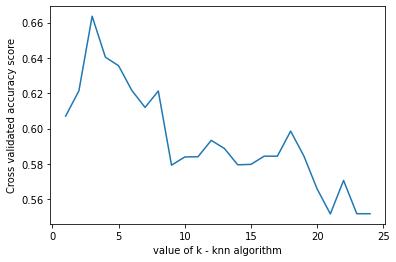

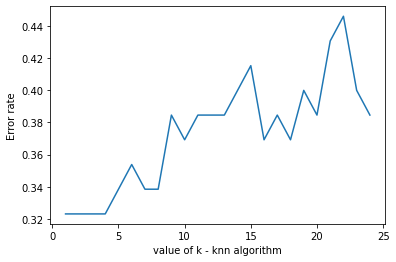

In [442]:
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,glass1,glass['Type'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

###K Fold Cross Validation

In [443]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.73333333 0.6        0.53333333 0.6        0.4        0.6
 0.53333333 0.4        0.46666667 0.42857143]


In [444]:
num_folds = 10
kfold = KFold(n_splits=10)

In [445]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.5295


##Visualizing CV result

In [446]:
import matplotlib.pyplot as plt
%matplotlib inline

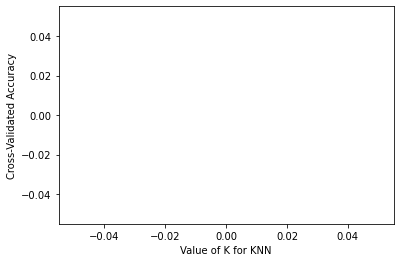

In [447]:
k_range = range(1,41)
k_scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x, y, cv=5)
  k_scores.append(scores.mean())

plt.plot(k_range, k_scores) 
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show() 

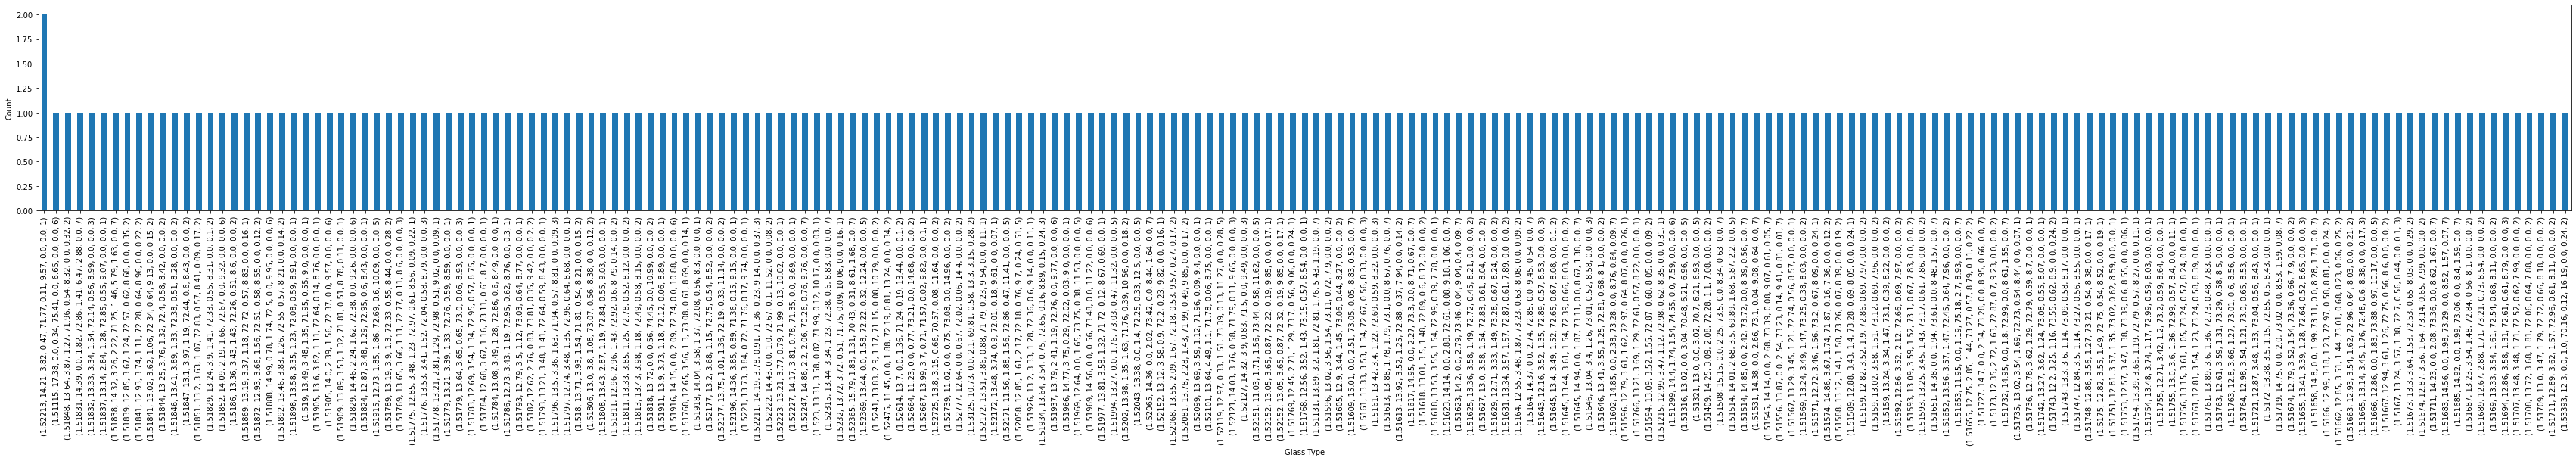

In [448]:
# Class wise glass counts.
plt.figure(figsize=(60,5));
glass.value_counts().plot(kind="bar");
plt.xlabel('Glass Type');
plt.ylabel("Count");
plt.plot();